In [2]:
import numpy as np

import sys

sys.path.append('../scripts')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from elements import *

import measurement as me

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook

dB2lin = lambda x: 10**(x/10)
lin2dB = lambda x: 10*np.log10(x)

## Define typical optomechanical system

The values of all the parameters have been measured. The values correspond to the chip [AY_old_moreH-20180516-1-5](http://lpqm1srv2.epfl.ch/elog/circuit/?Chip=%5EAY_old_moreH-20180516-1-5%24). The link brings you directly to the corresponding elog entries. With this chip same squeezing experiments have been performed.

In [18]:
omega_c = 6.941e9*np.pi*2

kappa_0 = 0.05e6*np.pi*2 #This value is very approximate (Data from Kerr power sweep of Jul 21 2018)
kappa_ex = 6.6e6*np.pi*2
kappa = kappa_0 + kappa_ex

omega_m = 5.134e6*np.pi*2
gamma_m = 151*np.pi*2

attenuationsrc_chip = 95.5 #dB
P_src = 20 #dBm

P_in = dB2lin(P_src - attenuationsrc_chip - 30) #30 is for milliW

g_0 = 201*np.pi*2

omega_drive = omega_c # omega_m


from DCnonlinearities import optomechanics

omdir = optomechanics(P_in, kappa_0, kappa_ex, omega_c, omega_drive, omega_m, g_0)

g= omdir['g']

print ('Cooperativity C: ',g**2/kappa/gamma_m)

#this comment just means that we pump in resonance
#omega_c = omdir['omega_c']

a = Mode('a', omega_c)
b = Mode('b', omega_m)

a_inex = Input('ex', a, kappa_ex, kind = 'drive', omega_drive = omega_drive, bath_temp=10e-3)
a_in0 = Input('0', a, kappa_0, kind = 'bath', bath_temp=10e-3)
b_in0 = Input('0', b, gamma_m, kind = 'bath', bath_temp=10e-3)

g_ab = Coupling(a, b, g * np.array([1,0,0,0]))

sys_om = System([a, b], [b_in0 ,a_in0, a_inex], [g_ab])

Cooperativity C:  23.425718754909205


## Measure mechanical sidebands

In [19]:
a_outex = Output(sys_om, a_inex)

omegas = np.linspace(omega_m - 100*gamma_m,  omega_m + 100*gamma_m, 1001)

spec = me.spectrum(omegas,me.HomodynMeasurement(a_outex, 0.05), components=True)

<IPython.core.display.Javascript object>


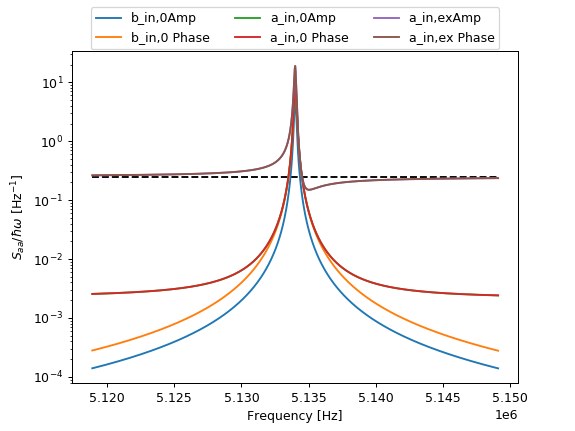

<IPython.core.display.Javascript object>


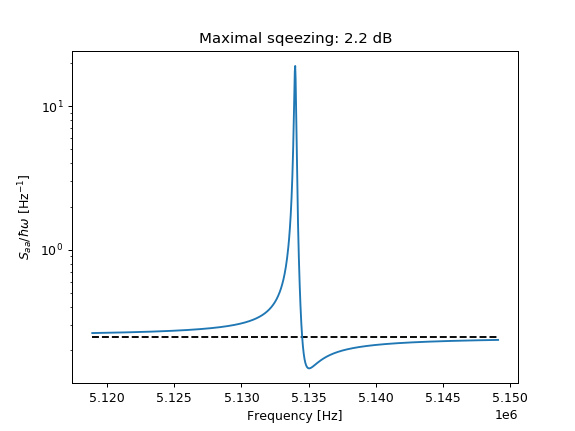

In [27]:
plt.figure()

for i, inp in enumerate(sys_om.inputs):
    plt.semilogy(omegas/2/np.pi, spec[:,2*i], label = str(inp) + 'Amp')
    plt.semilogy(omegas/2/np.pi, spec[:,2*i + 1], label = str(inp) + ' Phase')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_{aa}/\hbar \omega$ [Hz$^{-1}$]')

plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3)

plt.hlines([0.25], min(omegas/2/np.pi), max(omegas/2/np.pi), linestyles='--')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.figure()


plt.semilogy(omegas/2/np.pi, spec[:,-1])
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'$S_{aa}/\hbar \omega$ [Hz$^{-1}$]')

plt.title('Maximal sqeezing: '+str(np.round(lin2dB(1/4 / min(spec[:,-1])),1))+ ' dB')

plt.hlines([0.25], min(omegas/2/np.pi), max(omegas/2/np.pi), linestyles='--')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))